## <font color='blue'>Deep Learning</font>
<br>
## Sanjiv R. Das
<br>
### Professor of Finance and Data Science
### Santa Clara University
<br>
## <font color='green'>London, June 2018</font>
<br>

REFERENCE BOOK: http://srdas.github.io/DLBook

WORKSHOP (June 26, 2 hours)

TITLE: Introduction to Deep Learning

ABSTRACT: This workshop will cover the essentials of deep learning from a mathematical and programming perspective.
- What is deep learning?
- Types of deep learning
- Mathematics of Deep Learning: universal approximation using neural nets, Backpropagation, and techniques for fitting deep learning nets.
- Programming deep learning: tensorflow, mxnet, h2o in R and Python with applications.

In [1]:
%pylab inline
import pandas as pd
from IPython.external import mathjax

Populating the interactive namespace from numpy and matplotlib


![](images/ML.png)

https://medium.com/machine-learning-for-humans/why-machine-learning-matters-6164faf1df12


![](images/DL_PatternRecognition.png)

## Examples of Different Types of Neurons

#### Net input 

$$
a_j^{(r)} = \sum_{i=1}^{n^{(r-1)}} W_{ij} Z_i^{(r-1)} + b_j^{(r)}
$$



#### Sigmoid

$$
Z_j^{(r)} = \frac{1}{1+\exp(a_j^{(r)})} \in (0,1)
$$



#### ReLU (restricted linear unit)

$$
Z_j^{(r)} = \max[0, a_j^{(r)}] \in (0,1)
$$



#### TanH (hyperbolic tangent)

$$
Z_j^{(r)} = \tanh[a_j^{(r)}] \in (-1,+1)
$$

![](images/NN_diagram.png)

![](images/NN_subset.png)

![](images/Activation_functions.png)

![](images/Softmax.png)

In [2]:
#The Softmax function
#Assume 10 output nodes with randomly generated values
z = randn(32)  #inputs from last hidden layer of 32 nodes to the output layer
w = rand(32*10).reshape((10,32))  #weights for the output layer
b = rand(10)   #bias terms at output later
a = w.dot(z) + b  #Net input at output layer
e = exp(a)
softmax_output = e/sum(e)
print(softmax_output.round(3))
print('final tag =',where(softmax_output==softmax_output.max())[0][0])

[0.034 0.057 0.072 0.18  0.205 0.012 0.276 0.004 0.096 0.063]
final tag = 6


![](images/Loss_function.png)

## More on Cross Entropy

https://rdipietro.github.io/friendly-intro-to-cross-entropy-loss/

Notation from the previous slides: 

- $y_i$: actual probability of the correct class $i$, i.e., $1$ or $0$. 
- $a_i$: predicted probability of the correct class. 
- $n$: number of observations in the data. 



#### Entropy 

$$
E = - \frac{1}{n} \sum_i [y_i \ln y_i]
$$

In [4]:
y = [0.33, 0.33, 0.34]
bits = log2(y)
entropy = -sum(y*bits)
print(entropy)

y = [0.2, 0.3, 0.5]
entropy = -sum(y*log2(y))
print(entropy)

y = [0.1, 0.1, 0.8]
entropy = -sum(y*log2(y))
print(entropy)


1.58481870497303
1.4854752972273344
0.9219280948873623


Cross-entropy:

$$
C = - \frac{1}{n} \sum_i [y_i \ln a_i]
$$

where $a_i = {\hat y_i}$.

Note that $C > E$ always. 

In [5]:
#Correct prediction
y = [0, 0, 1]
yhat = [0.1, 0.1, 0.8]
crossentropy = -sum(y*log2(yhat))
print(crossentropy)

#Wrong prediction
yhat = [0.1, 0.6, 0.3]
crossentropy = -sum(y*log2(yhat))
print(crossentropy)

0.3219280948873623
1.7369655941662063


### Kullback-Leibler Divergence

$$
KL = \sum_i y_i \cdot \log \left(\frac{y_i}{\hat{y_i}} \right)
$$

Measures the extra bits required if the wrong selection is made. 

In [6]:
#Correct prediction
y = [0, 0, 1.0]
yhat = [0.1, 0.1, 0.8]
KL = -sum(y[2]*log2(y[2]/yhat[2]))
print(KL)

#Wrong prediction
yhat = [0.1, 0.6, 0.3]
KL = -sum(y[2]*log2(y[2]/yhat[2]))
print(KL)

-0.32192809488736235
-1.7369655941662063


![](images/Gradient_descent.png)

## Batch Stochastic Gradient

![](images/batch_stochastic_gradient.png)

1.	Initialize all the weight and bias parameters $(w_{ij}^{(r)},b_i^{(r)})$  (this is a critical step).

2.	For $q = 0,...,{M\over B}-1$ repeat the following steps (2a) - (2f):

a. For the training inputs $X_i(m), qB\le m\le (q+1)B$, compute the model predictions $y(m)$ given by

$$
a_i^{(r)}(m) = \sum_{j=1}^{P^{r-1}} w_{ij}^{(r)}z_j^{(r-1)}(m)+b_i^{(r)} \quad \mbox{and} \quad z_i^{(r)}(m) = f(a_i^{(r)}(m)), \quad 2 \leq r \leq R, 1 \leq i \leq P^r  
$$

and for $r=1$,

$$
a_i^{(1)}(m) = \sum_{j=1}^{P^1} w_{ij}^{(1)}x_j(m)+b_i^{(1)} \quad \mbox{and} \quad z_i^{(1)}(m) = f(a_i^{(1)}(m)), \quad  1 \leq i \leq N    
$$

The logits and classification probabilities are computed using

$$
a_i^{(R+1)}(m) = \sum_{j=1}^K w_{ij}^{(R+1)}z_j^{(R)}(m)+b_i^{(R+1)} \quad \mbox{and} \quad y_i(m) = \frac{\exp(a_i^{(R+1)}(m))}{\sum_{k=1}^K \exp(a_k^{(R+1)}(m))}, \quad  1 \leq i \leq K   
$$

This step constitutes the _forward pass_ of the algorithm.

b. Evaluate the gradients $\delta_k^{(R+1)}(m)$ for the logit layer nodes using

$$
\delta_k^{(R+1)}(m) = y_k(m) - t_k(m),\ \ 1\le k\le K
$$

This step and the following one constitute the start of the backward pass of the algorithm, in which we compute the gradients $\delta_k^{(r)}, 1 \leq k \leq K, 1\le r\le R$ for all the hidden nodes.

c. Back-propagate the $\delta$s using the following equation to obtain the $\delta_j^{(r)}(m), 1 \leq r \leq R, 1 \leq j \leq P^r$  for each hidden node in the network.

$$
\delta_j^{(r)}(m) = f'(a_j^{(r)}(m)) \sum_k w_{kj}^{(r+1)} \delta_k^{(r+1)}(m), \quad 1 \leq r \leq R
$$


d. Compute the gradients of the Cross Entropy Function $\mathcal L(m)$ for the $m$-th training vector $(X{(m)}, T{(m)})$ with respect to all the weight and bias parameters using the following equation.

$$
\frac{\partial\mathcal L(m)}{\partial w_{ij}^{(r+1)}} = \delta_i^{(r+1)}(m) z_j^{(r)}(m) \quad \mbox{and} \quad \frac{\partial \mathcal L(m)}{\partial b_i^{(r+1)}} = \delta_i^{(r+1)}(m), \quad 0 \leq r \leq R
$$

e. Change the model weights according to the formula

$$
w_{ij}^{(r)} \leftarrow w_{ij}^{(r)} - \frac{\eta}{B}\sum_{m=qB}^{(q+1)B} \frac{\partial\mathcal L(m)}{\partial w_{ij}^{(r)}},  
$$

$$
b_i^{(r)} \leftarrow b_i^{(r)} - \frac{\eta}{B}\sum_{m=qB}^{(q+1)B} \frac{\partial{\mathcal L}(m)}{\partial b_i^{(r)}},
$$

f. Increment $q\leftarrow (q+1)\mod B$ and go back to step $(a)$.

Compute the Loss Function $L$ over the Validation Dataset given by

$$
L = -{1\over V}\sum_{m=1}^V\sum_{k=1}^K t_k{(m)} \log y_k{(m)}
$$

If $L$ has dropped below some threshold, then stop. Otherwise go back to Step 2.

## Gradient Descent Example

![](images/Gradient_Descent_Scheme.png)

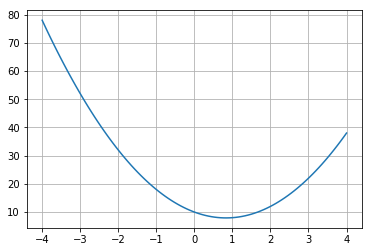

In [30]:
def f(x):
    return 3*x**2 -5*x + 10

x = linspace(-4,4,100)
plot(x,f(x))
grid()

In [35]:
dx = 0.001
eta = 0.05  #learning rate
x = -3
for j in range(20):
    df_dx = (f(x+dx)-f(x))/dx
    x = x - eta*df_dx
    print(x,f(x))

-1.8501500000001698 29.519915067502733
-1.0452550000002532 18.503949045077853
-0.4818285000003115 13.105618610239208
-0.08742995000019249 10.460081738472072
0.18864903499989083 9.163520200219716
0.3819043244999847 8.528031116715445
0.5171830271499616 8.216519714966186
0.6118781190049631 8.06379390252634
0.6781646833034642 7.988898596522943
0.7245652783124417 7.95215813604575
0.7570456948186948 7.934126078037087
0.7797819863730542 7.925269906950447
0.7956973904611502 7.920916059254301
0.8068381733227685 7.918772647178622
0.8146367213259147 7.917715356568335
0.8200957049281836 7.917192371084045
0.8239169934497053 7.916932669037079
0.8265918954147882 7.9168030076222955
0.8284643267903373 7.916737788340814
0.8297750287532573 7.916704651261121


## Vanishing Gradients

- In large problems, gradients simply vanish too soon before training has reached an acceptable level of accuracy. 

- There are several issues with gradient descent that need handling, and to solve this, there are several fixes that may be applied. 

- Learning rate $\eta$ may be too large or too small.

![](images/LearningRate_Matters.png)

## Gradients in Multiple Dimensions

![](images/GD_MultipleDimensions.png)

## Saddle Points

<img src="images/GD_saddle.png" height="100" width="300">

## Effect of the Learning Rate

The idea is to start with a high learning rate and then adaptively reduce it as we get closer to the minimum of the loss function. 

![](images/LearningRateAnnealing.png)


## Annealing

Reduce the learning rate as a step function when the reduction in the loss function begins to plateau.

![](images/LearningRateAnnealing2.png)

## Learning Rate Algorithms

- Improve the speed of convergence (for example the Momentum, Nesterov Momentum, and Adam algorithms).

- Adapt the effective Learning Rate as the training progresses (for example the ADAGRAD, RMSPROP and Adam algorithms).


## Momentum

Fixes the problem where the gradient is multidimensional and has a fast gradient on some axes and a slow one on the others. 

At the end of the $n^{th}$ iteration of the Backprop algorithm, define a sequence $v(n)$ by

$$
v(n) = \rho\; v(n-1) - \eta \; g(n), \quad \quad v(0)=0
$$

where $\rho$ is new hyper-parameter called the "momentum" parameter, and $g(n)$ is the gradient evaluated at parameters value $w(n)$, defined by

$$
g(n) = \frac{\partial {\mathcal L(n)}}{\partial w}
$$

for Stochastic Gradient Descent and 

$$
g(n) = {1\over B}\sum_{m=nB}^{(n+1)B}\frac{\partial {\mathcal L(m)}}{\partial w}
$$

for Batch Stochastic Gradient Descent (note that in this case $n$ is an index into the batch number). 



The change in parameter values on each iteration is now defined as

\begin{equation}
w(n+1) = w(n) + v(n)  
\end{equation}

It can be shown from these equations that $v(n)$ can be written as

\begin{equation}
v(n) = - \eta\sum_{i=0}^{n-1} \rho^{n-i} g(i)   
\end{equation}

so that

\begin{equation}
w(n+1) = w(n) - \eta\sum_{i=0}^{n-1} \rho^{n-i} g(i)   
\end{equation}



### Behavior of Momentum Parameter

When the momentum parameter $\rho = 0$, then this equation reduces to the usual Stochastic Gradient Descent iteration. On the other hand, when $\rho > 0$, then we get some interesting behaviors:

- If the gradients $g(i)$ are such that they change sign frequently (as in the steep side of the loss surface), then the stepsize $\sum_{i=0}^n \rho^{n-i}g(i)$ will be small. Thus the change in these parameters with the number of iterations will limited.

- If the gradients $g(i)$ are such that they maintain their sign (as in the shallow portion of the loss surface), then the stepsize $\sum_{i=0}^n \rho^{n-i}g(i)$ will be large. This means that if the gradients maintain their sign then the corresponding parameters will take bigger and bigger steps as the algorithm progresses, even though the individual gradients may be small.

## Properties of the Momentum algorithm

- The Momentum algorithm thus accelerates parameter convergence for parameters whose gradients consistently point in the same direction, and slows parameter change for parameters whose gradient changes sign frequently, thus resulting in faster convergence.
- The variable $v(n)$ is analogous to velocity in a dynamical system, while the parameter $1-\rho$ plays the role of the co-efficient of friction. 
- The value of $\rho$ determines the degree of momentum, with the momentum becoming stronger as $\rho$ approaches $1$. 


Note that
$$
\sum_{i=0}^{n} \rho^{n-i}g(i) \le {g_{max}\over 1-\rho}
$$
$\rho$ is usually set to the neighborhood of $0.9$ and from the above equation it follows that
$\sum_{i=0}^n \rho^{n-i}g(i)\approx 10g$ assuming all the $g(i)$ are approximately equal to $g$.  Hence the effective gradient is ten times the value of the actual gradient. This results in an "overshoot" where the value of the parameter shoots past the minimum point to the other side of the bowl, and then reverses itself. This is a desirable behavior since it prevents the algorithm from getting stuck at a saddle point or a local minima, since the momentum carries it out from these areas.

## Nesterov Momentum

1.  Recall that the Momentum parameter update equations can be written as:
$$
v(n) = \rho\; v(n-1) - \eta \; g(w(n))
$$
$$
w(n+1) = w(n) + v(n) 
$$
2. These equations can be improved by evaluation of the gradient at parameter value $w(n+1)$ instead. 
3. Circular? in order to compute $w(n+1)$ we first need to compute $g(w(n))$. 
$$
w(n+1)\approx w(n) + \rho v(n-1) 
$$
4. Gives the velocity update equation for Nesterov Momentum
$$
v(n) = \rho\; v(n-1) - \eta \; g(w(n)+\rho v(n-1))
$$
where $g(w(n)+\rho v(n-1))$ denotes the gradient computed at parameter values $w(n) + \rho v(n-1)$. 
5. Gradient Descent process speeds up considerably when compared to the plain Momentum method.

## The ADAGRAD Algorithm

1. Parameter update rule:
\begin{equation}
w(n+1) = w(n) - \frac{\eta}{\sqrt{\sum_{i=1}^n g(n)^2+\epsilon}}\; g(n) 
\end{equation}

2. Constant $\epsilon$ has been added to better condition the denominator and is usually set to a small number such $10^{-7}$.

3. Each parameter gets its own adaptive Learning Rate, such that large gradients have smaller learning rates and small gradients have larger learning rates ($\eta$ is usually defaulted to $0.01$). As a result the progress along each dimension evens out over time, which helps the training process. 

4. The change in rates happens automatically as part of the parameter update equation.

5. Downside: accumulation of gradients in the denominator leads to the continuous decrease in Learning Rates which can lead to a halt of training in large networks that require a greater number of iterations. 

## The RMSPROP Algorithm

1. Accumulates the sum of gradients using a sliding window:
$$
E[g^2]_n = \rho E[g^2]_{n-1} + (1-\rho) g(n)^2
$$
where $\rho$ is a decay constant (usually set to $0.9$). This operation (called a Low Pass Filter) has a windowing effect, since it forgets gradients that are far back in time. 
2. The quantity $RMS[g]_n$ defined by
$$
RMS[g]_n = \sqrt{E[g^2]_n + \epsilon}
$$
\begin{equation}
w(n+1) = w(n) - \frac{\eta}{RMS[g]_n}\; g(n)  
\end{equation}
3. Note that
$$
E[g^2]_n = (1-\rho)\sum_{i=0}^n \rho^{n-i} g(i)^2 \le \frac{g_{max}}{1-\rho}
$$
which shows that the parameter $\rho$ prevents the sum from blowing up, and a large value of $\rho$ is equivalent to using a larger window of previous gradients in computing the sum. 

## The ADAM Algorithm

1. The Adaptive Moment Estimation (Adam) algorithm combines the best of algorithms such as Momentum that speed up the training process, with algorithms such as RMSPROP that adaptively vary the effective Learning Rate.

$$
\Lambda(n) = \beta\Lambda(n-1) +(1-\beta)g(n),\ \ \ {\hat\Gamma}(n) = \frac{\Gamma(n)}{1-\beta^n}
$$

$$
\Delta(n) = \alpha\Delta(n-1) + (1-\alpha) g(n)^2,\ \ \ {\hat\Delta}(n) = \frac{\Delta(n)}{1-\alpha^n}
$$

$$
w(n+1) = w(n) - \eta\frac{\hat\Lambda(n)}{\sqrt{\hat\Delta(n) + \epsilon}}
$$

2. $\Delta(n)$ is identical to that of $E[g^2]_n$ in the RMSPROP, and it serves an identical purpose, i.e., rates for parameters with larger gradients are equalized with those for parameters with smaller gradients.

3. The sequence $\Lambda(n)$ is used to provide "Momentum" to the updates, and works in a fashion similar to the velocity sequence $v(n)$ in the Momentum algorithm.

$$
\Lambda(n) = (1-\rho)\sum_{i=0}^n \rho^{n-i} g(i) \le \frac{g_{max}}{1-\rho}
$$

4. The parameters $\alpha$ and $\beta$ are usually defaulted to $10^{-8}$ and $0.999$ respectively.

![](images/Chain_rule.png)

![](images/Delta_values.png)

![](images/Output_layer.png)

![](images/Feedforward_Backprop.png)

![](images/Recap.png)

![](images/Backprop_one_slide.png)

## Back to Activation Functions (Vanishing Gradients)

![](images/sigmoid_activation.png)

## tanh Activation

![](images/tanh_activation.png)

1. Unless the input is in the neghborhood of zero, the function enters its saturated regime. 

2. It is superior to the sigmoid in one respect, i.e., its output is zero centered. This  speeds up the training process. 

3. The $\tanh$ function is rarely used in modern DLNs, the exception being a type DLN called LSTM.

## ReLU Activation

![](images/relu_activation.png)

$$
z = \max(0,a)
$$

1. No saturation problem. 

2. Gradients $\frac{\partial L}{\partial w}$ propagate undiminished through the network, provided all the nodes are active.

## Dead ReLU Problem

![](images/dead_relu.png)

1. The dotted line in this figure shows a case in which the weight parameters $w_i$ are such that the hyperplane $\sum w_i z_i$ does not intersect the "data cloud" of possible input activations. This implies that there does not exist any possible input values that can lead to $\sum w_i z_i > 0$. Hence the neuron's output activation will always be zero, and it will kill all gradients backpropagating down from higher layers.

2. Vary initialization to correct this. 

## Leaky ReLU

![](images/leaky_relu.png)

$$
z = \max(ca,a),\ \ 0\le c<1
$$

- Fixes the dead ReLU problem. 

## PreLU 

![](images/prelu.png)

$$
z_i = \max(\beta_i a_i,a_i), \quad 1 \le i \le S
$$

1. Instead of deciding on the value of $c$ through experimentation, why not determine it using Backpropagation as well. This is the idea behind the Pre-ReLU or PReLU function.



Note that each neuron $i$ now has its own parameter $\beta_i, 1\le i\le S$, where $S$ is the number of nodes in the network. These parameters are iteratively estimated using Backprop.

$$
\frac{\partial\mathcal L}{\partial\beta_i} = \frac{\partial\mathcal L}{\partial z_i}\frac{\partial z_i}{\partial\beta_i},\ \ 1\le i\le S
$$

Substituting the value for $\frac{\partial z_i}{\partial\beta_i}$ we obtain
$$
\frac{\partial\mathcal L}{\partial\beta_i} = a_i\frac{\partial\mathcal L}{\partial z_i}\ \ if\ a_i \le 0\ \ \mbox{and} \ \ 0 \ \ \mbox{otherwise}
$$

which is then used to update $\beta_i$ using $\beta_i\rightarrow\beta_i - \eta\frac{\partial\mathcal L}{\partial\beta_i}$.

Once training is complete, the PreLU based DLN network ends up with a different value of $\beta_i$ at each neuron, which increases the flexibility of the network at the cost of an increase in the number of parameters.

## Maxout

![](images/maxout.png)

Generalizes Leaky ReLU. 

$$
z'_i = \max(c\big[\sum_j w_{ij}z_j +b_i\big],\sum_j w_{ij}z_j +b_i),
$$

We may allow the two hyperplanes to be independent with their own set of parameters, as shown in the Figure above.

## Initializing Weights

In practice, the DLN weight parameters are initialized with random values drawn from Gaussian or Uniform distributions and the following rules are used: 

- Guassian Initialization: If the weight is between layers with $n_{in}$ input neurons and $n_{out}$ output neurons, then they are initialized using a Gaussian random distribution with mean zero and standard deviation $\sqrt{2\over n_{in}+n_{out}}$. 

- Uniform Initialization: In the same configuration as above, the weights should be initialized using an Uniform distribution between $-r$ and $r$, where $r = \sqrt{6\over n_{in}+n_{out}}$.

When using the ReLU or its variants, these rules have to be modified slightly:

- Guassian Initialization: If the weight is between layers with $n_{in}$ input neurons and $n_{out}$ output neurons, then they are initialized using a Gaussian random distribution with mean zero and standard deviation $\sqrt{4\over n_{in}+n_{out}}$. 

- Uniform Initialization: In the same configuration as above, the weights should be initialized using an Uniform distribution between $-r$ and $r$, where $r = \sqrt{12\over n_{in}+n_{out}}$.

The reasoning behind scaling down the initialization values as the number of incident weights increases is to prevent saturation of the node activations during the forward pass of the Backprop algorithm, as well as large values of the gradients during backward pass. 

## Data Preprocessing

![](images/data_preprocessing.png)

**Centering**: This is also sometimes called Mean Subtraction, and is the most common form of preprocessing. Given an input dataset consisting of $M$ vectors $X(m) = (x_1(m),...,x_N(m)), m = 1,...,M$, it consists of subtracting the mean across each individual input component $x_i, 1\leq i\leq N$ such that
$$
x_i(m) \leftarrow x_i(m) - \frac{\sum_{s=1}^{M}x_i(s)}{M},\ \ 1\leq i\leq N, 1\le m\le M
$$

**Scaling**: After the data has been centered, it can be scaled in one of two ways:

+ By dividing by the standard deviation, once again along each dimension, so that the overall transform is
        
$$
x_i(m) \leftarrow \frac{x_i(m) - - \frac{\sum_{s=1}^{M}x_i(s)}{M}}{\sigma_i},\ \ 1\leq i\leq N, 1\le m\le M
$$

+ By Normalizing each dimension so that the min and max along each axis are -1 and +1 repectively.
   
- In general Scaling helps optimization because it balances out the rate at which the weights connected to the input nodes learn.

## Zero Centering Helps

![](images/zero_centering_helps.png)



Recall that for a K-ary Linear Classifier, the parameter update equation is given by:

$$
w_{kj} \leftarrow w_{kj} - \eta x_j(y_k-t_k),\ \ 1\le k\le K,\ \ 1\le j\le N
$$

If the training sample is such that $t_q = 1$ and $t_k = 0, j\ne q$, then the update becomes:

$$
w_{qj} \leftarrow w_{qj} - \eta x_j(y_q-1)
$$

and

$$ 
w_{kj} \leftarrow w_{kj} - \eta x_j(y_k),\ \ k\ne q
$$

Lets assume that the input data is not centered so that $x_j\ge 0, j=1,...,N$. Since $0\le y_k\le 1$ it follows that 

$$
\Delta w_{kj} = -\eta x_jy_k <0, k\ne q
$$ 

and 

$$
\Delta w_{qj} = -\eta x_j(y_q - 1) > 0
$$ 

i.e. the update results in all the weights moving in the same direction, except for one. This is shown graphically in the Figure above, in which the system is trying move in the direction of the blue arrow which is the quickest path to the minimum. However if the input data is not centered, then it is forced to move in a zig-zag fashion as shown in the red-curve.The zig-zag motion is caused due to the fact that all the parameters move in the same direction at each step due to the lact of zero-centering in the input data.

## Batch Normalization

Normalization applied to the hidden layers. 

![](images/batch_normalization.png)

* It enables higher learning rates: In a non-normalized network, a large learning rate can lead to oscillations and cause the loss function increase rather than decrease. 

* It enables better Gradient Propagation through the network, thus enabling DLNs with more hidden layers.

* It helps to reduce strong dependencies on the parameter initialization values.

* It helps to regularize the model.

## Under and Over-fitting

![](images/underoverfitting.png)


## Regularization

* Early Stopping

* L1 Regularization

* L2 Regularization

* Dropout Regularization

* Training Data Augmentation

* Batch Normalization

## Early Stopping

![](images/early_stopping.png)

## L2 Regularization

L2 Regularization is a commonly used technique in ML systems is also sometimes referred to as “Weight Decay”. It works by adding a quadratic term to the Cross Entropy Loss Function $\mathcal L$, called the Regularization Term, which results in a new Loss Function $\mathcal L_R$ given by:

\begin{equation}
\mathcal L_R = {\mathcal L} + \frac{\lambda}{2} \sum_{r=1}^{R+1} \sum_{j=1}^{P^{r-1}} \sum_{i=1}^{P^r} (w_{ij}^{(r)})^2  
\end{equation}

L2 Regularization also leads to more "diffuse" weight parameters, in other words, it encourages the network to use all its inputs a little rather than some of its inputs a lot. 

## L1 Regularization

L1 Regularization uses a Regularization Function which is the sum of the absolute value of all the weights in DLN, resulting in the following loss function ($\mathcal L$ is the usual Cross Entropy loss):

\begin{equation}
\mathcal L_R = \mathcal L + {\lambda} \sum_{r=1}^{R+1} \sum_{j=1}^{P^{r-1}} \sum_{i=1}^{P^r} |w_{ij}^{(r)}|  (\#eq:L1reg)
\end{equation}

At a high level L1 Regularization is similar to L2 Regularization since it leads to smaller weights.

1. Both L1 and L2 Regularizations lead to a reduction in the weights with each iteration. However the way the weights drop is different: 

2. In L2 Regularization the weight reduction is multiplicative and proportional to the value of the weight, so it is faster for large weights and de-accelerates as the weights get smaller. 

3. In L1 Regularization on the other hand, the weights are reduced by a fixed amount in every iteration, irrespective of the value of the weight. Hence for larger weights L2 Regularization is faster than L1, while for smaller weights the reverse is true. 

4. As a result L1 Regularization leads to DLNs in which the weight of most of the connections tends towards zero, with a few connections with larger weights left over. This type of DLN that results after the application of L1 Regularization is said to be “sparse”.

## Dropout regularization

![](images/dropout.png)


The basic idea behind Dropout is to run each iteration of the Backprop algorithm on randomly modified versions of the original DLN. The random modifications are carried out to the topology of the DLN using the following rules: 

-	Assign probability values $p^{(r)}, 0 \leq r \leq R$, which is defined as the probability that a node is present in the model, and use these to generate $\{0,1\}$-valued Bernoulli random variables $e_j^{(r)}$:

$$
e_j^{(r)} \sim Bernoulli(p^{(r)}), \quad 0 \leq r \leq R,\ \  1 \leq j \leq P^r
$$

-	Modify the input vector as follows:

\begin{equation}
\hat x_j = e_j^{(0)} x_j, \quad 1 \leq j \leq N   
\end{equation}

- Modify the activations $z_j^{(r)}$ of the hidden layer r as follows:

\begin{equation}
\hat z_j^{(r)} = e_j^{(r)} z_j^{(r)}, \quad 1 \leq r \leq R,\ \  1 \leq j \leq P^r   
\end{equation}

1. After the Backprop is complete, we have effectively trained a collection of up to $2^s$ thinned DLNs all of which share the same weights, where $s$ is the total number of hidden nodes in the DLN. 

2. In order to test the network, strictly speaking we should be averaging the results from all these thinned models, however a simple approximate averaging method works quite well. 

3. The main idea is to use the complete DLN as the test network.

## Bagging (Ensemble Learning)

![](images/bagging.png)


![](images/TensorFlow_playground.png)

http://playground.tensorflow.org/

## Pattern Recognition: Cancer

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
## Read in the data set
data = pd.read_csv("data/BreastCancer.csv")
data.head()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,benign
1,1002945,5,4,4,5,7,10,3,2,1,benign
2,1015425,3,1,1,1,2,2,3,1,1,benign
3,1016277,6,8,8,1,3,4,3,7,1,benign
4,1017023,4,1,1,3,2,1,3,1,1,benign


In [3]:
x = data.loc[:,'Cl.thickness':'Mitoses']
print(x.head())
y = data.loc[:,'Class']
print(y.head())

   Cl.thickness  Cell.size  Cell.shape  Marg.adhesion  Epith.c.size  \
0             5          1           1              1             2   
1             5          4           4              5             7   
2             3          1           1              1             2   
3             6          8           8              1             3   
4             4          1           1              3             2   

   Bare.nuclei  Bl.cromatin  Normal.nucleoli  Mitoses  
0            1            3                1        1  
1           10            3                2        1  
2            2            3                1        1  
3            4            3                7        1  
4            1            3                1        1  
0    benign
1    benign
2    benign
3    benign
4    benign
Name: Class, dtype: object


In [4]:
## Convert the class variable into binary numeric
ynum = zeros((len(x),1))
for j in arange(len(y)):
    if y[j]=="malignant":
        ynum[j]=1
ynum[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [5]:
## Make label data have 1-shape, 1=malignant
from keras import utils
y.labels = utils.to_categorical(ynum, num_classes=2)
#x = x.as_matrix()
print(y.labels[:10])
print(shape(x))
print(shape(y.labels))
print(shape(ynum))

/Users/srdas/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
(683, 9)
(683, 2)
(683, 1)


In [6]:
## Define the neural net and compile it
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=9))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
## Fit/train the model (x,y need to be matrices)
model.fit(x, ynum, epochs=25, batch_size=32,verbose=2)

Epoch 1/25
 - 0s - loss: 0.6186 - acc: 0.5476
Epoch 2/25
 - 0s - loss: 0.4578 - acc: 0.8946
Epoch 3/25
 - 0s - loss: 0.3477 - acc: 0.9151
Epoch 4/25
 - 0s - loss: 0.2756 - acc: 0.9458
Epoch 5/25
 - 0s - loss: 0.2359 - acc: 0.9444
Epoch 6/25
 - 0s - loss: 0.2116 - acc: 0.9414
Epoch 7/25
 - 0s - loss: 0.1978 - acc: 0.9502
Epoch 8/25
 - 0s - loss: 0.1680 - acc: 0.9561
Epoch 9/25
 - 0s - loss: 0.1535 - acc: 0.9649
Epoch 10/25
 - 0s - loss: 0.1389 - acc: 0.9649
Epoch 11/25
 - 0s - loss: 0.1416 - acc: 0.9561
Epoch 12/25
 - 0s - loss: 0.1184 - acc: 0.9649
Epoch 13/25
 - 0s - loss: 0.1204 - acc: 0.9649
Epoch 14/25
 - 0s - loss: 0.1076 - acc: 0.9678
Epoch 15/25
 - 0s - loss: 0.0929 - acc: 0.9678
Epoch 16/25
 - 0s - loss: 0.0966 - acc: 0.9707
Epoch 17/25
 - 0s - loss: 0.0902 - acc: 0.9736
Epoch 18/25
 - 0s - loss: 0.0809 - acc: 0.9722
Epoch 19/25
 - 0s - loss: 0.0824 - acc: 0.9766
Epoch 20/25
 - 0s - loss: 0.0741 - acc: 0.9766
Epoch 21/25
 - 0s - loss: 0.0773 - acc: 0.9751
Epoch 22/25
 - 0s - lo

In [8]:
## Accuracy
yhat = model.predict_classes(x, batch_size=32)
acc = sum(yhat==ynum)
print("Accuracy = ",acc/len(ynum))

## Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(yhat,ynum)

Accuracy =  0.9853587115666179


array([[434,   0],
       [ 10, 239]])

# Another Canonical Example:  Digit Recognition (MNIST)

- Extensible to many finance prediction problems. 
- Information set: 784 (28 x 28) pixels for category prediction. 
- Would you run a multinomial regression on these 784 columns. 

![](MNIST.png)

https://www.cs.toronto.edu/~kriz/cifar.html

In [9]:
## Read in the data set
train = pd.read_csv("data/train.csv", header=None)
test = pd.read_csv("data/test.csv", header=None)
print(shape(train))
print(shape(test))

(60000, 785)
(10000, 785)


In [10]:
## Reformat the data
X_train = train.as_matrix()[:,0:784]
Y_train = train.as_matrix()[:,784:785]
print(shape(X_train))
print(shape(Y_train))
X_test = test.as_matrix()[:,0:784]
Y_test = test.as_matrix()[:,784:785]
print(shape(X_test))
print(shape(Y_test))
y.labels = utils.to_categorical(Y_train, num_classes=10)
print(shape(y.labels))
print(y.labels[1:5,:])
print(Y_train[1:5])

(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)
(60000, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[3]
 [0]
 [0]
 [2]]


/Users/srdas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/srdas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/srdas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/srdas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


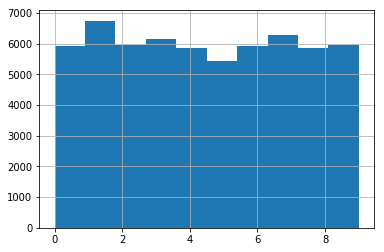

In [11]:
hist(Y_train); grid()

In [12]:
## Define the neural net and compile it
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD

data_dim = shape(X_train)[1]

model = Sequential([
    Dense(100, input_shape=(784,)),
    Activation('sigmoid'),
    Dense(100),
    Activation('sigmoid'),
    Dense(100),
    Activation('sigmoid'),
    Dense(100),
    Activation('sigmoid'),
    Dense(10),
    Activation('softmax'),
])

#model = Sequential()
#model.add(Dense(100, activation='sigmoid', input_dim=data_dim))
#model.add(Dropout(0.25))
#model.add(Dense(100, activation='sigmoid'))
#model.add(Dropout(0.25))
#model.add(Dense(100, activation='sigmoid'))
#model.add(Dropout(0.25))
#model.add(Dense(100, activation='sigmoid'))
#model.add(Dropout(0.25))
#model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
## Fit/train the model (x,y need to be matrices)
model.fit(X_train, y.labels, epochs=10, batch_size=32,verbose=2)

Epoch 1/10
 - 7s - loss: 0.7339 - acc: 0.7693
Epoch 2/10
 - 7s - loss: 0.3392 - acc: 0.9016
Epoch 3/10
 - 8s - loss: 0.2837 - acc: 0.9159
Epoch 4/10
 - 9s - loss: 0.2514 - acc: 0.9253
Epoch 5/10
 - 10s - loss: 0.2290 - acc: 0.9307
Epoch 6/10
 - 9s - loss: 0.2204 - acc: 0.9336
Epoch 7/10
 - 10s - loss: 0.2124 - acc: 0.9357
Epoch 8/10
 - 9s - loss: 0.2053 - acc: 0.9384
Epoch 9/10
 - 9s - loss: 0.1949 - acc: 0.9414
Epoch 10/10
 - 9s - loss: 0.1930 - acc: 0.9415


In [14]:
## In Sample
yhat = model.predict_classes(X_train, batch_size=32)

## Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yhat,Y_train)
print(" ")
print(cm)

##
acc = sum(diag(cm))/len(Y_train)
print("Accuracy = ",acc)


 
[[5804    0   64   27    9   67   57   13   30   21]
 [   4 6577   21   19   17    8    8   36   77   26]
 [  11   42 5593   97   24   11   13   58   39   11]
 [   9   18   37 5539    0   82    0   32   79   43]
 [  11    6   54    3 5520   12   34   23   19  140]
 [  18   30   12  234    9 5063   56   14   96   49]
 [  26    6   72   15   44   68 5722    1   34    1]
 [   0   12   33   44   10   12    0 5995    7   99]
 [  34   48   62  119   22   74   28   14 5389   53]
 [   6    3   10   34  187   24    0   79   81 5506]]
Accuracy =  0.9451333333333334


In [15]:
## Out of Sample
yhat = model.predict_classes(X_test, batch_size=32)

## Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yhat,Y_test)
print(" ")
print(cm)

##
acc = sum(diag(cm))/len(Y_test)
print("Accuracy = ",acc)


 
[[ 963    0   16    2    1   12   13    2    9    6]
 [   0 1114    2    0    3    3    1   14    8    5]
 [   1    5  959   15    5    2    5   14    4    0]
 [   1    2    9  922    0   15    0    9    9    8]
 [   0    0    8    0  929    2    4    2    6   27]
 [   3    3    2   37    1  830   14    1   16    8]
 [   7    4   15    2   13    8  914    0    9    0]
 [   1    0    6    9    2    0    0  962    3   11]
 [   4    7   13   21    2   16    7    3  897   14]
 [   0    0    2    2   26    4    0   21   13  930]]
Accuracy =  0.942


# Learning the Black-Scholes Equation

See : Hutchinson, Lo, Poggio (1994)

In [16]:
from scipy.stats import norm
def BSM(S,K,T,sig,rf,dv,cp):  #cp = {+1.0 (calls), -1.0 (puts)}
    d1 = (math.log(S/K)+(rf-dv+0.5*sig**2)*T)/(sig*math.sqrt(T))
    d2 = d1 - sig*math.sqrt(T)
    return cp*S*math.exp(-dv*T)*norm.cdf(d1*cp) - cp*K*math.exp(-rf*T)*norm.cdf(d2*cp)

df = pd.read_csv('/Users/srdas/GoogleDrive/Papers/DeepLearning/DLinFinance/BlackScholesNN/training.csv')

# Normalizing spot and call prices
$C$ is homogeneous degree one, so
$$ aC(S,K) = C(aS,aK) $$
This means we can normalize spot and call prices and remove  a variable by dividing by $K$.
$$ \frac{C(S,K)}{K} = C(S/K,1) $$

In [17]:
df['Stock Price'] = df['Stock Price']/df['Strike Price']
df['Call Price']  = df['Call Price'] /df['Strike Price']

# Data, libraries, activation functions

In [18]:
n = 300000
n_train =  (int)(0.8 * n)
train = df[0:n_train]
X_train = train[['Stock Price', 'Maturity', 'Dividends', 'Volatility', 'Risk-free']].values
y_train = train['Call Price'].values
test = df[n_train+1:n]
X_test = test[['Stock Price', 'Maturity', 'Dividends', 'Volatility', 'Risk-free']].values
y_test = test['Call Price'].values

In [19]:
#Import libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LeakyReLU
from keras import backend

def custom_activation(x):
    return backend.exp(x)

# Set up, compile and fit the model

In [20]:
nodes = 120
model = Sequential()

model.add(Dense(nodes, input_dim=X_train.shape[1]))
#model.add("relu")
model.add(Dropout(0.25))

model.add(Dense(nodes, activation='elu'))
model.add(Dropout(0.25))

model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(nodes, activation='elu'))
model.add(Dropout(0.25))

model.add(Dense(1))
model.add(Activation(custom_activation))
          
model.compile(loss='mse',optimizer='rmsprop')

model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.1, verbose=2)

Train on 216000 samples, validate on 24000 samples
Epoch 1/10
 - 13s - loss: 0.0061 - val_loss: 6.8796e-04
Epoch 2/10
 - 11s - loss: 0.0015 - val_loss: 2.9255e-04
Epoch 3/10
 - 12s - loss: 0.0011 - val_loss: 8.2461e-04
Epoch 4/10
 - 11s - loss: 9.2878e-04 - val_loss: 4.5576e-04
Epoch 5/10
 - 12s - loss: 8.1162e-04 - val_loss: 4.2201e-04
Epoch 6/10
 - 11s - loss: 7.3420e-04 - val_loss: 7.7427e-05
Epoch 7/10
 - 12s - loss: 6.8677e-04 - val_loss: 2.7576e-04
Epoch 8/10
 - 12s - loss: 6.5881e-04 - val_loss: 4.0098e-04
Epoch 9/10
 - 12s - loss: 6.3421e-04 - val_loss: 1.6051e-04
Epoch 10/10
 - 14s - loss: 6.1618e-04 - val_loss: 1.9364e-04


In [21]:
def CheckAccuracy(y,y_hat):
    stats = dict()
    
    stats['diff'] = y - y_hat
    
    stats['mse'] = mean(stats['diff']**2)
    print("Mean Squared Error:      ", stats['mse'])
    
    stats['rmse'] = sqrt(stats['mse'])
    print("Root Mean Squared Error: ", stats['rmse'])
    
    stats['mae'] = mean(abs(stats['diff']))
    print("Mean Absolute Error:     ", stats['mae'])
    
    stats['mpe'] = sqrt(stats['mse'])/mean(y)
    print("Mean Percent Error:      ", stats['mpe'])
    
    #plots
    mpl.rcParams['agg.path.chunksize'] = 100000
    figure(figsize=(14,10))
    plt.scatter(y, y_hat,color='black',linewidth=0.3,alpha=0.4, s=0.5)
    plt.xlabel('Actual Price',fontsize=20,fontname='Times New Roman')
    plt.ylabel('Predicted Price',fontsize=20,fontname='Times New Roman') 
    plt.show()
    
    figure(figsize=(14,10))
    plt.hist(stats['diff'], bins=50,edgecolor='black',color='white')
    plt.xlabel('Diff')
    plt.ylabel('Density')
    plt.show()
    
    return stats

# Predict and check accuracy (in-sample)

Mean Squared Error:       0.00019331166020661818
Root Mean Squared Error:  0.013903656361066257
Mean Absolute Error:      0.01131060501646567
Mean Percent Error:       0.0519749087373072


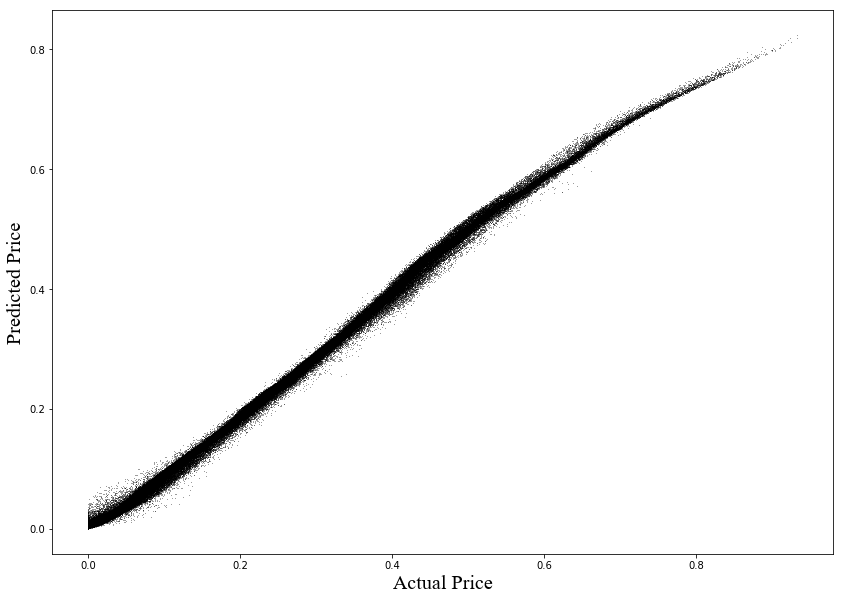

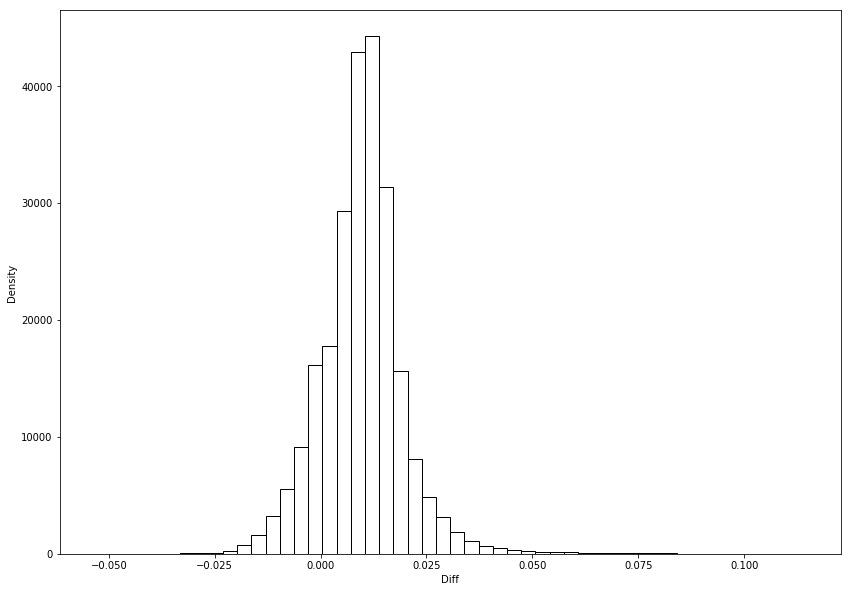

{'diff': array([0.00933984, 0.01065514, 0.01606907, ..., 0.00951744, 0.01472562,
        0.01627947]),
 'mse': 0.00019331166020661818,
 'rmse': 0.013903656361066257,
 'mae': 0.01131060501646567,
 'mpe': 0.0519749087373072}

In [22]:
y_train_hat = model.predict(X_train)
#reduce dim (240000,1) -> (240000,) to match y_train's dim
y_train_hat = squeeze(y_train_hat)
CheckAccuracy(y_train, y_train_hat)

# Predict and check accuracy (validation-sample)

Mean Squared Error:       0.0001924910075256892
Root Mean Squared Error:  0.013874112855447342
Mean Absolute Error:      0.011297652288298902
Mean Percent Error:       0.05193892352955392


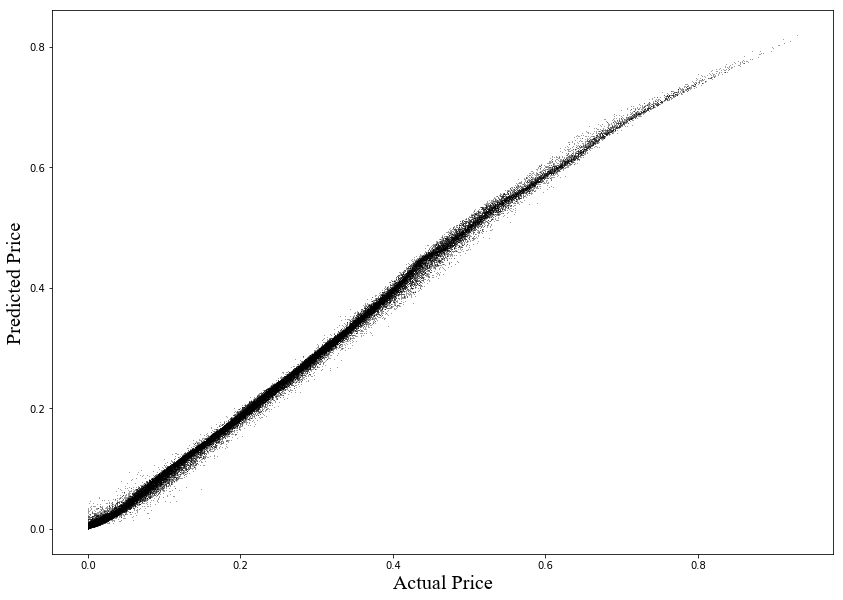

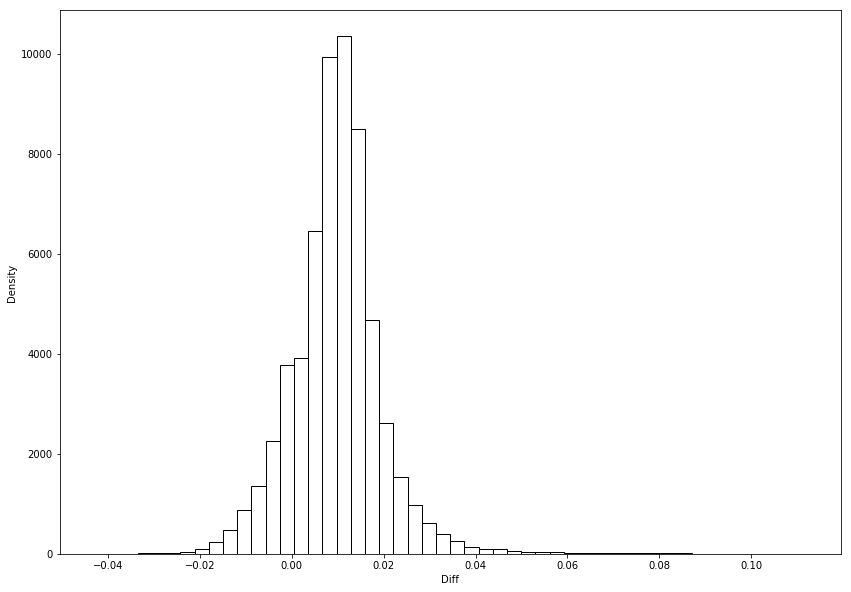

In [23]:
y_test_hat = model.predict(X_test)
y_test_hat = squeeze(y_test_hat)
test_stats = CheckAccuracy(y_test, y_test_hat)

# Random Forest of decision trees

A Random Forest uses several decision trees to make hypotheses about regions within subsamples of the data, then makes predictions based on the majority vote of these trees. This safeguards against overfitting/memorization of the training data.


# Prepare Data

In [24]:
n = 300000
n_train =  (int)(0.8 * n)
train = df[0:n_train]
X_train = train[['Stock Price', 'Maturity', 'Dividends', 'Volatility', 'Risk-free']].values
y_train = train['Call Price'].values
test = df[n_train+1:n]
X_test = test[['Stock Price', 'Maturity', 'Dividends', 'Volatility', 'Risk-free']].values
y_test = test['Call Price'].values

In [25]:
def CheckAccuracy(y,y_hat):
    stats = dict()
    
    stats['diff'] = y - y_hat
    
    stats['mse'] = mean(stats['diff']**2)
    print("Mean Squared Error:      ", stats['mse'])
    
    stats['rmse'] = sqrt(stats['mse'])
    print("Root Mean Squared Error: ", stats['rmse'])
    
    stats['mae'] = mean(abs(stats['diff']))
    print("Mean Absolute Error:     ", stats['mae'])
    
    stats['mpe'] = sqrt(stats['mse'])/mean(y)
    print("Mean Percent Error:      ", stats['mpe'])
    
    #plots
    mpl.rcParams['agg.path.chunksize'] = 100000
    #figure(figsize=(14,10))
    plt.scatter(y, y_hat,color='black',linewidth=0.3,alpha=0.4, s=0.5)
    plt.xlabel('Actual Price',fontsize=20,fontname='Times New Roman')
    plt.ylabel('Predicted Price',fontsize=20,fontname='Times New Roman') 
    plt.show()
    
    #figure(figsize=(14,10))
    plt.hist(stats['diff'], bins=50,edgecolor='black',color='white')
    plt.xlabel('Diff')
    plt.ylabel('Density')
    plt.show()
    
    return stats

# Fit Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest = forest.fit(X_train, y_train)
y_test_hat = forest.predict(X_test)

Mean Squared Error:       5.113459072207158e-05
Root Mean Squared Error:  0.007150845455054359
Mean Absolute Error:      0.005232728067483401
Mean Percent Error:       0.02676979920311822


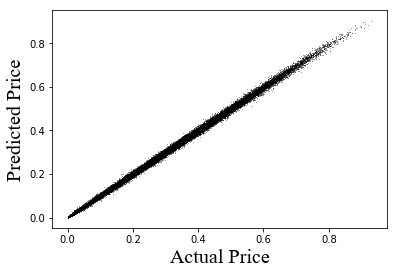

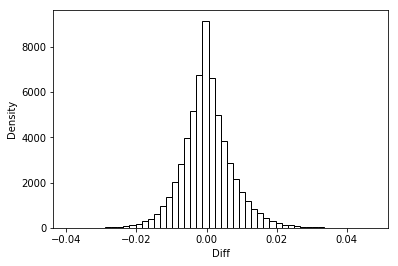

In [27]:
stats = CheckAccuracy(y_test, y_test_hat)